In [ ]:
# Kng Yew Chian, March 2023
# Using pretrained weights from the previous model, but replacing Output Layer

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#!tar -xf ./drive/MyDrive/school/PetImages.tar -C ./drive/MyDrive/school/

In [ ]:
model = keras.models.load_model('./drive/MyDrive/school/stanford_dogs_model.keras')
cats_and_dogs_model = keras.models.load_model('./drive/MyDrive/school/experiment1a_model.keras')

In [ ]:
model.summary()
print(len(model.layers))

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 180, 180, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 90, 90, 128)  3584        ['rescaling_3[0][0]']            
                                                                                                  
 batch_normalization_24 (BatchN  (None, 90, 90, 128)  512        ['conv2d_12[0][0]']        

In [ ]:
activation = "sigmoid"
outputs = layers.Dense(1, activation=activation)(model.layers[-2].output)
model2 = keras.Model(inputs=model.input, outputs=outputs)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 180, 180, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 90, 90, 128)  3584        ['rescaling_3[0][0]']            
                                                                                                  
 batch_normalization_24 (BatchN  (None, 90, 90, 128)  512        ['conv2d_12[0][0]']          

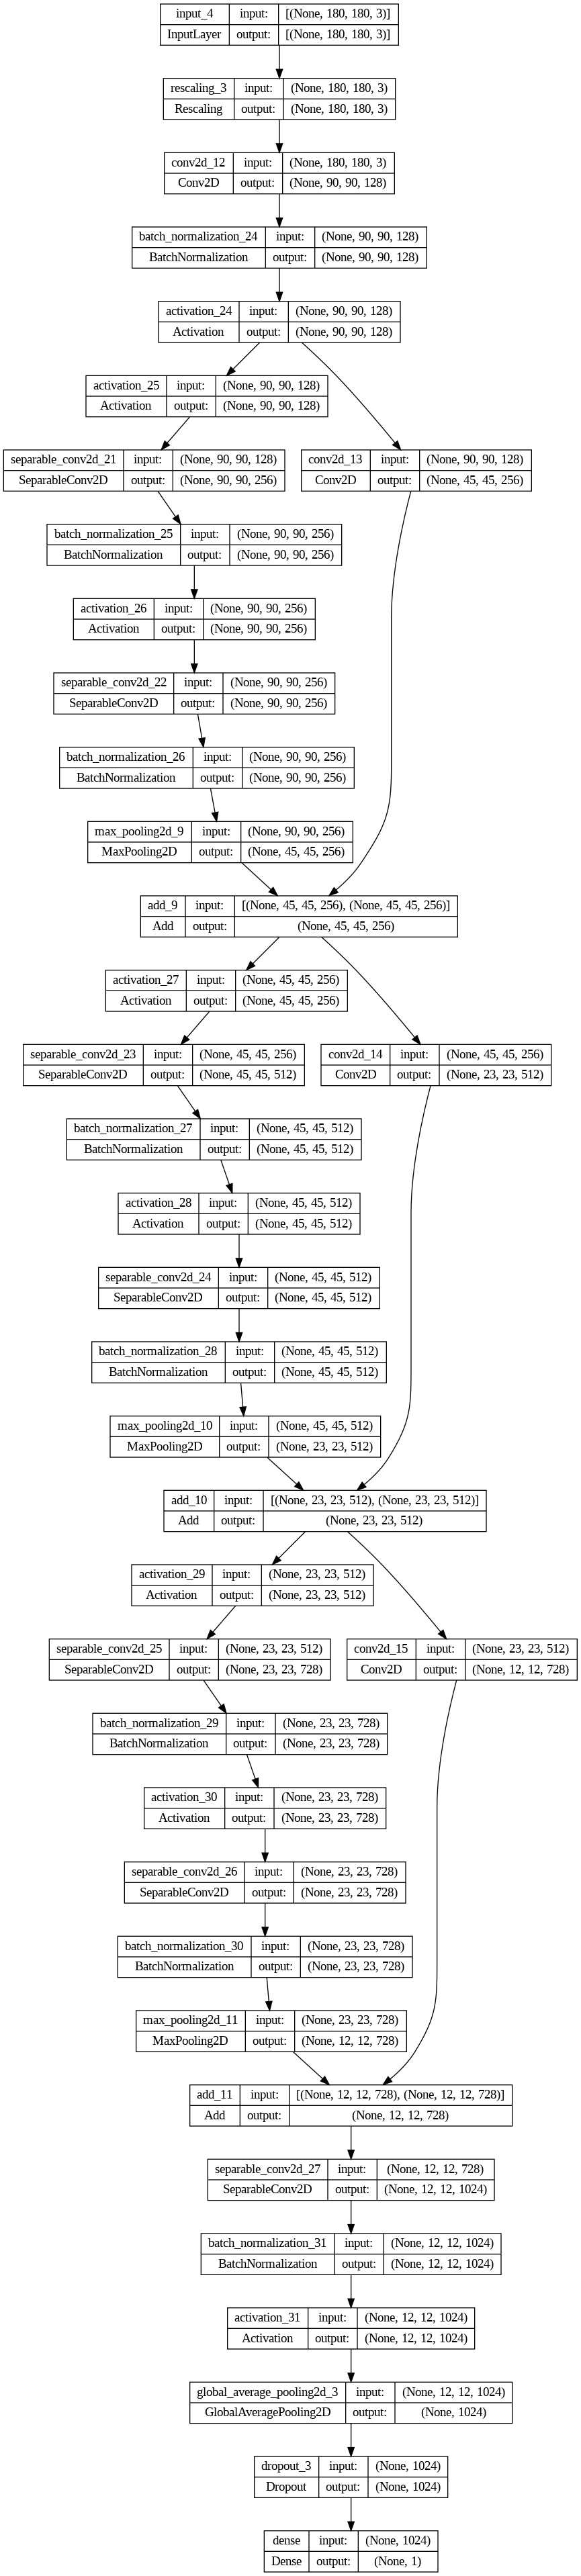

In [ ]:
keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("./drive/MyDrive/school/PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [ ]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "./drive/MyDrive/school/PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23420 files belonging to 2 classes.
Using 18736 files for training.
Using 4684 files for validation.


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [ ]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)

# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model2.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model2.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
147/147 [==============================] - 265s 2s/step - loss: 0.3237 - accuracy: 0.8596 - val_loss: 0.2635 - val_accuracy: 0.8813
Epoch 2/25
147/147 [==============================] - 217s 1s/step - loss: 0.1665 - accuracy: 0.9345 - val_loss: 0.1371 - val_accuracy: 0.9479
Epoch 3/25
147/147 [==============================] - 217s 1s/step - loss: 0.1296 - accuracy: 0.9491 - val_loss: 0.1121 - val_accuracy: 0.9564
Epoch 4/25
147/147 [==============================] - 222s 1s/step - loss: 0.1124 - accuracy: 0.9559 - val_loss: 0.1110 - val_accuracy: 0.9562
Epoch 5/25
147/147 [==============================] - 217s 1s/step - loss: 0.0952 - accuracy: 0.9631 - val_loss: 0.1302 - val_accuracy: 0.9488
Epoch 6/25
147/147 [==============================] - 217s 1s/step - loss: 0.0857 - accuracy: 0.9675 - val_loss: 0.1008 - val_accuracy: 0.9592
Epoch 7/25
147/147 [==============================] - 216s 1s/step - loss: 0.0783 - accuracy: 0.9707 - val_loss: 0.0884 - val_accuracy: 0.9667

In [ ]:
model2.save("experiment2_model.keras")

In [ ]:
model2 = keras.models.load_model('drive/MyDrive/school/experiment2_model.keras')